# DTW POZOS PETROLEROS



### Instalar e importar librerias

In [ ]:
!pip install dtw-python

import numpy as np
import pandas as pd
from random import sample
import random
import itertools
import matplotlib.pyplot as plt
import statistics 
%matplotlib inline
# dynamic time warping\n
from dtw import *

#!pip install dtaidistance

     |████████████████████████████████| 580 kB 5.4 MB/s 
Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [ ]:
# Dataset Pozos

url = 'https://raw.githubusercontent.com/lbsbcyborg/Project_Time_Series_Clustering/main/Coseries%20Pozos3.csv'
df1 = pd.read_csv(url)

etiquetas = pd.read_csv('https://raw.githubusercontent.com/AdrianRinconCol/Project_Time_Series_Clustering/main/etiquetas.csv')

In [ ]:
etiquetas.head()

,Unnamed: 0,GR7-3,GR-8,GRA-53
0,T1,7794.73,7794.73,7794.73
1,T2,7894.23,7944.73,7889.73
2,T3,8139.73,8369.73,8209.73
3,T4,8469.72,8469.72,8584.70
4,T5,8681.70,8681.70,8681.70


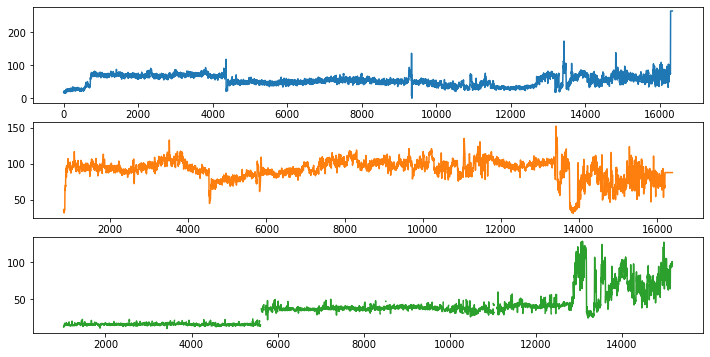

In [ ]:
df1
fig, [ax1,ax2,ax3] = plt.subplots(nrows = 3, figsize = (12,6))
df1['GR7-3'].plot(ax = ax1, color = "C0")
df1['GR7-8'].plot(ax = ax2, color = "C1")
df1['GRA-53'].plot(ax = ax3, color = "C2")

#### Limpieza de los datos

Se eliminan las profundidades de medición en las cuales no hay registro en los 3 pozos. Así mismo, se toma desde la profundidad **6970.77** ya que a partir de esa los datos tienen relevancia en el estudio.

In [ ]:
 #df1.dropna( inplace=True)
 df2 = df1[14980:15175]
 df2.tail()
 #etiquetas

,DEPTH,GR7-3,GR7-8,GRA-53
15170,8679.7,67.81,72.81,95.84
15171,8680.2,67.63,72.88,95.95
15172,8680.7,70.75,72.19,96.86
15173,8681.2,68.13,75.19,96.71
15174,8681.7,66.88,76.75,98.15


In [ ]:
df = pd.DataFrame()
p1 = df1[['DEPTH','GR7-3']]

#for i in etiquetas['Unnamed: 0'].unique():
 # p1['label'] = 

p2 = df1[['DEPTH','GR7-8']]
p3 = df1[['DEPTH','GRA-53']]



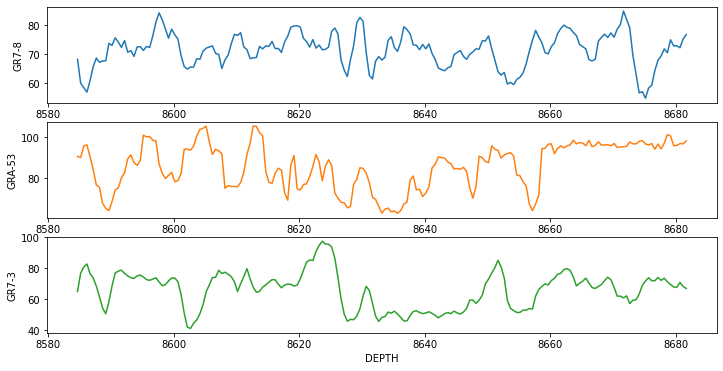

In [ ]:
import seaborn as sns

fig, [ax1,ax2,ax3] = plt.subplots(nrows = 3, figsize = (12,6))

sns.lineplot(data=df1, x="DEPTH", y="GR7-8",ax=ax1, color = "C0")
sns.lineplot(data=df1, x="DEPTH", y="GRA-53", ax= ax2, color = "C1")
sns.lineplot(data=df1, x="DEPTH", y="GR7-3", ax= ax3, color = "C2")

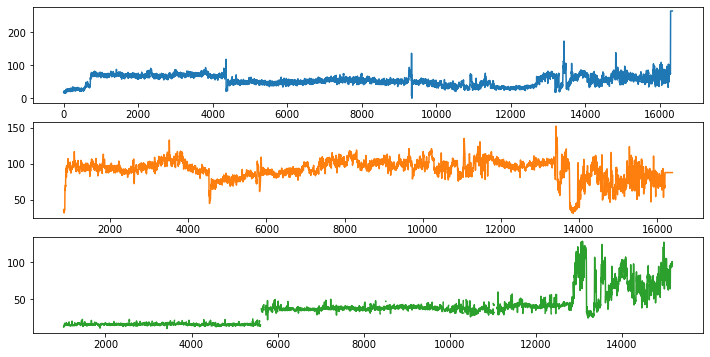

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows = 3, figsize = (12,6))
df1['GR7-3'].plot(ax = ax1, color = "C0")
df1['GR7-8'].plot(ax = ax2, color = "C1")
df1['GRA-53'].plot(ax = ax3, color = "C2")

¿Cual Step- Pattern es el que se va a usar??
* rabinerJuangStepPattern
* symmetric1
* symmetric2
* asymmetric

In [ ]:
Patrones = [symmetric1,
            symmetric2,
            asymmetric]

p1 = []
p2 = []
p3 = []

for step in Patrones:
  p1.append(dtw(dff["GR7-3"],dff["GR7-8"],keep_internals=True,step_pattern=step).distance)
  p2.append(dtw(dff["GR7-3"],dff["GRA-53"],keep_internals=True,step_pattern=step).distance)
  p3.append(dtw(dff["GRA-53"],dff["GR7-8"],keep_internals=True,step_pattern=step).distance)

for letter in ['a','b','c','d']:
  for i in range(1,8):
    p1.append(dtw(dff["GR7-3"],dff["GR7-8"],keep_internals=True,step_pattern=rabinerJuangStepPattern(i, letter)).distance)
    p2.append(dtw(dff["GR7-3"],dff["GRA-53"],keep_internals=True,step_pattern=rabinerJuangStepPattern(i, letter)).distance)
    p3.append(dtw(dff["GRA-53"],dff["GR7-8"],keep_internals=True,step_pattern=rabinerJuangStepPattern(i, letter)).distance)


distancias = pd.DataFrame(list(zip(p1, p2,p3)),columns =['GR7-3_vs_GR7-8', 'GR7-3_vs_GRA-53','GRA-53_vs_GR7-8'],
                          index =['symmetric1',
                                  'symmetric2',
                                  'asymmetric',
                                  'RJSP(1, "a")','RJSP(2, "a")','RJSP(3, "a")','RJSP(4, "a")','RJSP(5, "a")','RJSP(6, "a")','RJSP(7, "a")',
                                  'RJSP(1, "b")','RJSP(2, "b")','RJSP(3, "b")','RJSP(4, "b")','RJSP(5, "b")','RJSP(6, "b")','RJSP(7, "b")',
                                  'RJSP(1, "c")','RJSP(2, "c")','RJSP(3, "c")','RJSP(4, "c")','RJSP(5, "c")','RJSP(6, "c")','RJSP(7, "c")',
                                  'RJSP(1, "d")','RJSP(2, "d")','RJSP(3, "d")','RJSP(4, "d")','RJSP(5, "d")','RJSP(6, "d")','RJSP(7, "d")'])

distancias

#### Prueba de Clasificación

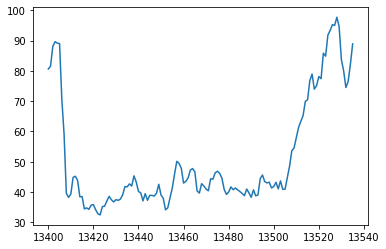

In [ ]:
# Pozo GRA-53 cilindro

df1.loc[13400:13535]['GRA-53'].plot()

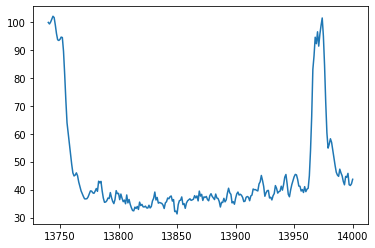

In [ ]:
# Pozo GR7-8 cilindro

df1.loc[13740:14000]['GR7-8'].plot()

In [ ]:
# Clases

df1['roca-gr7-8']= 0
df1['roca-gra-53']= 0

df1.loc[13740:14000]['roca-gr7-8']= 1
df1.loc[13160:13380]['roca-gra-53']= 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


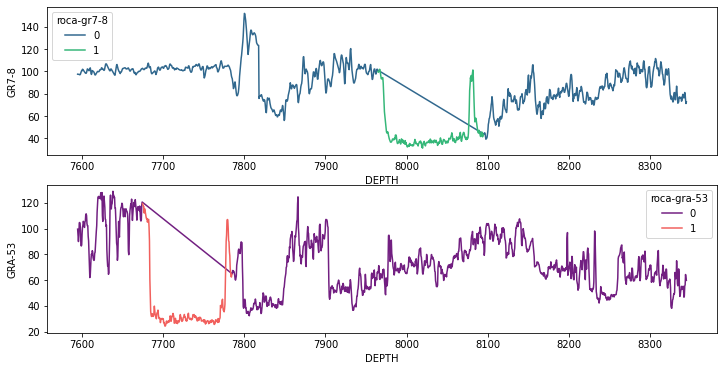

In [ ]:
import seaborn as sns

fig, [ax1,ax2] = plt.subplots(nrows = 2, figsize = (12,6))

sns.lineplot(data=df1.loc[13000:14500], x="DEPTH", y="GR7-8", hue="roca-gr7-8",palette= 'viridis',ax=ax1)
sns.lineplot(data=df1.loc[13000:14500], x="DEPTH", y="GRA-53", hue="roca-gra-53", palette= 'magma', ax= ax2)

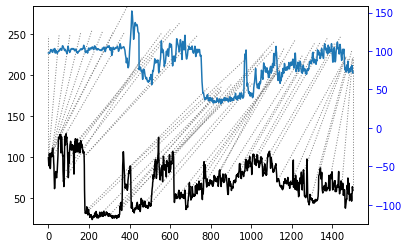

In [ ]:
test = dtw(df1.loc[13000:14500]["GRA-53"],df1.loc[13000:14500]["GR7-8"],keep_internals=True,step_pattern=symmetric1)

#test.plot(type="threeway",offset=150)
test.plot(type="twoway",offset=150)

##### Transferencia de la roca entre pozos y evaluación del error

In [ ]:
df1.reset_index(inplace=True)

In [ ]:
# extrae el index a un dataframe del dtw

test1 = pd.DataFrame()
test1['GRA-53'] = test.index1
test1['GR7-8'] = test.index2
#test1

#Identificar la roca en la matriz dtw --- aun no sirve bien el codigo
roca1 = df1.loc[13000:14500][df1.loc[13000:14500]["roca-gra-53"]==1].index-13000
#roca1


# Pasar roca real a la matriz test de la dtw
#test1['roca1'] = 1
test1['roca1'] = test1.apply(lambda x:1 if x['GRA-53'] in roca1 else 0 , axis=1)

# Sacar la roca transferida al segundo pozo segun la matriz dtw
pred = test1[test1['roca1']==1]['GR7-8']+13000
pred = pd.DataFrame(pred)
#pred['GR7-8']


#df1.reset_index(inplace=True)

# Pasar la roca trasnferida al dataframe de los pozos reales
df1['pred_gr7-8']= df1.apply(lambda x:1 if x['index'] in pred['GR7-8'].unique() else 0 , axis=1)

#df1[df1['pred_gr7-8']==1]

###### Grafico transferencia dtw vs real

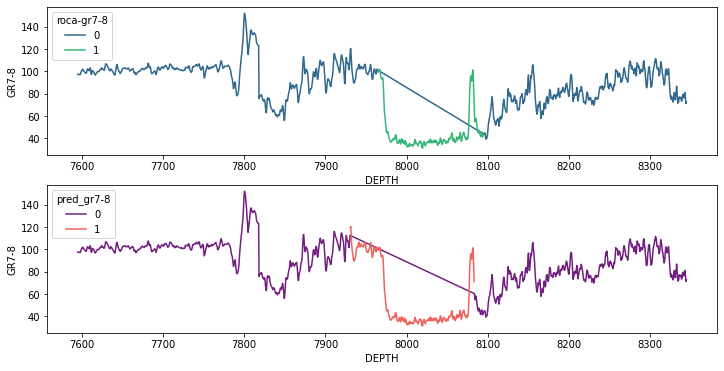

In [ ]:
fig, [ax1,ax2] = plt.subplots(nrows = 2, figsize = (12,6))

sns.lineplot(data=df1.loc[13000:14500], x="DEPTH", y="GR7-8", hue="roca-gr7-8",palette= 'viridis',ax=ax1)
sns.lineplot(data=df1.loc[13000:14500], x="DEPTH", y="GR7-8", hue="pred_gr7-8", palette= 'magma', ax= ax2)

###### Accuracy de la Predicción

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(df1['roca-gr7-8'],df1['pred_gr7-8'], labels=[1,0])
print(matrix)

tp, fn, fp, tn = confusion_matrix(df1['roca-gr7-8'],df1['pred_gr7-8'],labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(df1['roca-gr7-8'],df1['pred_gr7-8'],labels=[1,0])
print('Classification report : \n',matrix)

[[  238    23]
 [   68 16060]]
Outcome values : 
 238 23 68 16060
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.91      0.84       261
           0       1.00      1.00      1.00     16128

    accuracy                           0.99     16389
   macro avg       0.89      0.95      0.92     16389
weighted avg       1.00      0.99      0.99     16389



###### Verificando mejor DTW basado en errores de predicción

In [ ]:
Patrones = [symmetric1,
            symmetric2,
            asymmetric]

tp = []
fn = []
fp = []
tn = []


for step in Patrones:
  df2 = df1.copy(deep=True)
  test2 = dtw(df2.loc[13000:14500]["GRA-53"],df2.loc[13000:14500]["GR7-8"],keep_internals=True,step_pattern=step)
  test1 = pd.DataFrame()
  test1['GRA-53'] = test2.index1
  test1['GR7-8'] = test2.index2
  roca1 = df2.loc[13000:14500][df2.loc[13000:14500]["roca-gra-53"]==1].index-13000
  test1['roca1'] = test1.apply(lambda x:1 if x['GRA-53'] in roca1 else 0 , axis=1)
  pred = test1[test1['roca1']==1]['GR7-8']+13000
  pred = pd.DataFrame(pred)
  df2['pred_gr7-8']= df2.apply(lambda x:1 if x['index'] in pred['GR7-8'].unique() else 0 , axis=1)
  tp.append(confusion_matrix(df2['roca-gr7-8'],df2['pred_gr7-8'],labels=[1,0]).reshape(-1)[0])
  fn.append(confusion_matrix(df2['roca-gr7-8'],df2['pred_gr7-8'],labels=[1,0]).reshape(-1)[1])
  fp.append(confusion_matrix(df2['roca-gr7-8'],df2['pred_gr7-8'],labels=[1,0]).reshape(-1)[2])
  tn.append(confusion_matrix(df2['roca-gr7-8'],df2['pred_gr7-8'],labels=[1,0]).reshape(-1)[3])

for letter in ['a','b','c','d']:
  for i in range(1,8):
    df2 = df1.copy(deep=True)
    test2 = dtw(df2.loc[13000:14500]["GRA-53"],df2.loc[13000:14500]["GR7-8"],keep_internals=True,step_pattern=rabinerJuangStepPattern(i, letter))
    test1 = pd.DataFrame()
    test1['GRA-53'] = test2.index1
    test1['GR7-8'] = test2.index2
    roca1 = df2.loc[13000:14500][df2.loc[13000:14500]["roca-gra-53"]==1].index-13000
    test1['roca1'] = test1.apply(lambda x:1 if x['GRA-53'] in roca1 else 0 , axis=1)
    pred = test1[test1['roca1']==1]['GR7-8']+13000
    pred = pd.DataFrame(pred)
    df2['pred_gr7-8']= df2.apply(lambda x:1 if x['index'] in pred['GR7-8'].unique() else 0 , axis=1)
    tp.append(confusion_matrix(df2['roca-gr7-8'],df2['pred_gr7-8'],labels=[1,0]).reshape(-1)[0])
    fn.append(confusion_matrix(df2['roca-gr7-8'],df2['pred_gr7-8'],labels=[1,0]).reshape(-1)[1])
    fp.append(confusion_matrix(df2['roca-gr7-8'],df2['pred_gr7-8'],labels=[1,0]).reshape(-1)[2])
    tn.append(confusion_matrix(df2['roca-gr7-8'],df2['pred_gr7-8'],labels=[1,0]).reshape(-1)[3])



error = pd.DataFrame(list(zip(tp,fn,fp,tn)),columns =['tp', 'fn','fp', 'tn'],
                          index =['symmetric1',
                                  'symmetric2',
                                  'asymmetric',
                                  'RJSP(1, "a")','RJSP(2, "a")','RJSP(3, "a")','RJSP(4, "a")','RJSP(5, "a")','RJSP(6, "a")','RJSP(7, "a")',
                                  'RJSP(1, "b")','RJSP(2, "b")','RJSP(3, "b")','RJSP(4, "b")','RJSP(5, "b")','RJSP(6, "b")','RJSP(7, "b")',
                                  'RJSP(1, "c")','RJSP(2, "c")','RJSP(3, "c")','RJSP(4, "c")','RJSP(5, "c")','RJSP(6, "c")','RJSP(7, "c")',
                                  'RJSP(1, "d")','RJSP(2, "d")','RJSP(3, "d")','RJSP(4, "d")','RJSP(5, "d")','RJSP(6, "d")','RJSP(7, "d")'])

error


,tp,fn,fp,tn
symmetric1,238,23,68,16060
symmetric2,238,23,67,16061
asymmetric,0,261,193,15935
"RJSP(1, ""a"")",0,261,1,16127
"RJSP(2, ""a"")",0,261,163,15965
"RJSP(3, ""a"")",0,261,128,16000
"RJSP(4, ""a"")",0,261,122,16006
"RJSP(5, ""a"")",0,261,106,16022
"RJSP(6, ""a"")",0,261,204,15924
"RJSP(7, ""a"")",0,261,80,16048


In [ ]:
error['precision'] = (error['tp'])/(error['tp']+error['fp'])
error['recall'] = (error['tp'])/(error['tp']+error['fn'])
error